<a href="https://colab.research.google.com/github/zackoflonely/DATMIN-028-Zaki-Fauzan/blob/main/RegresiLogistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REGRESI LOGISTIK
NIM : 2109116028
NAMA : ZAKI FAUZAN RABBANI
KELAS : A 2021

###Tujuan Bisnis
Tujuan bisnis dari dataset ini adalah untuk menganalisis faktor-faktor yang mempengaruhi keberhasilan kelulusan mahasiswa berdasarkan nilai IPK mereka.
Tujuan lainnya adalah untuk meningkatkan pemahaman tentang profil mahasiswa yang memiliki tingkat kelulusan yang tinggi dan mengidentifikasi faktor-faktor yang dapat mempengaruhi kelulusan mereka.

###Assess Situation
Situasi bisnis yang mendasari analisis ini adalah pentingnya memahami faktor-faktor yang dapat mempengaruhi kelulusan mahasiswa. Faktor-faktor tersebut dapat mencakup tingkat kehadiran, usaha belajar, keterlibatan dalam kegiatan ekstrakurikuler, dan sebagainya.

###Data Mining Goals
Tujuan dari Data Mining pada dataset ini adalah untuk memprediksi tingkat kelulusan mahasiswa berdasarkan nilai IPK mereka. Selain itu, analisis ini bertujuan untuk mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kelulusan mahasiswa dan memberikan wawasan tentang profil mahasiswa yang memiliki tingkat kelulusan yang tinggi.

In [164]:
#Import Library yang diperlukan

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
from tabulate import tabulate
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay

In [165]:
# Menentukan jumlah baris dan kolom data dummy
num_samples = 100
num_features = 1

# Membuat data dummy acak berupa nilai IPK
np.random.seed(50)  # Menentukan untuk hasil yang dapat direproduksi
mean = 3.5  # Nilai rata-rata IPK
std_dev = 0.5  # Standar deviasi IPK
X = np.random.normal(mean, std_dev, (num_samples, num_features))
X = np.clip(X, 0.0, 4.0)  # Memastikan nilai IPK tidak melebihi 4.0
y = np.random.randint(2, size=num_samples)

# Menampilkan data dummy
print("Data Dummy IPK Mahasiswa:")
for i in range(num_samples):
    print("Data {}: IPK = {:.2f}, Label = {}".format(i+1, X[i][0], y[i]))

Data Dummy IPK Mahasiswa:
Data 1: IPK = 2.72, Label = 1
Data 2: IPK = 3.48, Label = 1
Data 3: IPK = 3.19, Label = 0
Data 4: IPK = 2.77, Label = 0
Data 5: IPK = 4.00, Label = 0
Data 6: IPK = 3.26, Label = 1
Data 7: IPK = 3.11, Label = 0
Data 8: IPK = 4.00, Label = 1
Data 9: IPK = 2.86, Label = 1
Data 10: IPK = 2.84, Label = 1
Data 11: IPK = 3.56, Label = 1
Data 12: IPK = 3.93, Label = 1
Data 13: IPK = 3.85, Label = 0
Data 14: IPK = 3.33, Label = 0
Data 15: IPK = 3.00, Label = 1
Data 16: IPK = 4.00, Label = 1
Data 17: IPK = 4.00, Label = 1
Data 18: IPK = 3.99, Label = 0
Data 19: IPK = 3.56, Label = 1
Data 20: IPK = 3.87, Label = 1
Data 21: IPK = 3.30, Label = 1
Data 22: IPK = 3.57, Label = 0
Data 23: IPK = 3.29, Label = 0
Data 24: IPK = 3.42, Label = 1
Data 25: IPK = 3.57, Label = 0
Data 26: IPK = 3.64, Label = 0
Data 27: IPK = 3.36, Label = 0
Data 28: IPK = 4.00, Label = 0
Data 29: IPK = 3.43, Label = 0
Data 30: IPK = 3.85, Label = 0
Data 31: IPK = 4.00, Label = 1
Data 32: IPK = 4.00, L

In [166]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
X_train

array([[3.76234335],
       [3.31853445],
       [3.359369  ],
       [3.92868098],
       [3.36467683],
       [4.        ],
       [3.39979184],
       [3.05511585],
       [2.83626055],
       [3.85396304],
       [3.93109686],
       [3.68926385],
       [3.67521537],
       [3.42511668],
       [4.        ],
       [3.26163393],
       [3.51950395],
       [4.        ],
       [3.6817323 ],
       [4.        ],
       [2.91607197],
       [3.87676084],
       [4.        ],
       [2.84661329],
       [4.        ],
       [3.8713927 ],
       [2.31327331],
       [3.64273468],
       [3.87328446],
       [3.33271741],
       [3.56976574],
       [2.76770976],
       [3.99388523],
       [3.18779142],
       [2.8588537 ],
       [3.90259452],
       [3.10976539],
       [3.37711167],
       [3.34264476],
       [2.21454012],
       [3.90783275],
       [3.23223221],
       [3.54798897],
       [2.74690536],
       [3.10339169],
       [3.39336666],
       [3.32057079],
       [3.054

In [168]:
y_train

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [169]:
from sklearn.preprocessing import StandardScaler
# Inisiasi objek scaler
scaler = StandardScaler()

# Lakukan scaling pada data train
X_train = scaler.fit_transform(X_train)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
X_test = scaler.transform(X_test)

In [170]:
# Membuat objek model regresi logistik
model = LogisticRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# classification_report_str = classification_report(y_test, y_pred)

# Menampilkan metrik evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Classification Report:")
# print(classification_report_str)

Accuracy: 0.6
Precision: 0.6428571428571429
Recall: 0.75
F1-Score: 0.6923076923076924
Classification Report:


In [171]:
table = [["Metrik", "Nilai"],
         ["Akurasi", accuracy],
         ["Presisi", precision],
         ["Recall", recall],
         ["F1-Score", f1]]

print(tabulate(table, headers="firstrow", tablefmt="grid"))
# print("\nClassification Report:\n", classification_report)

+----------+----------+
| Metrik   |    Nilai |
+==========+==========+
| Akurasi  | 0.6      |
+----------+----------+
| Presisi  | 0.642857 |
+----------+----------+
| Recall   | 0.75     |
+----------+----------+
| F1-Score | 0.692308 |
+----------+----------+


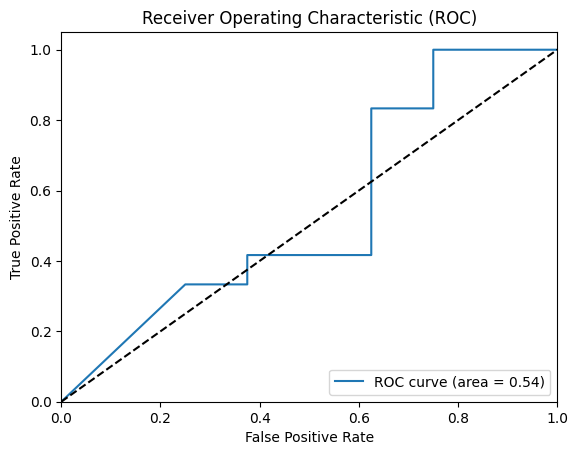

In [172]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kelas positif
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Menghitung nilai fpr (False Positive Rate), tpr (True Positive Rate), dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Menghitung nilai AUC (Area Under Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Membuat plot ROC Curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


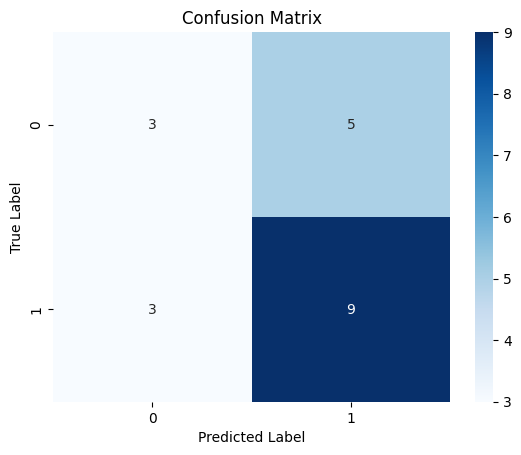

In [173]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Berdasarkan metrik evaluasi yang diperoleh dari data IPK mahasiswa, kita dapat menyimpulkan hal-hal berikut:

Akurasi: Nilai akurasi sebesar 0.6 menunjukkan bahwa model berhasil memprediksi dengan benar sekitar 60% dari data uji.
Presisi: Nilai presisi sebesar 0.642857 menunjukkan bahwa sekitar 64% dari prediksi positif yang dibuat oleh model adalah benar.
Recall: Nilai recall sebesar 0.75 menunjukkan bahwa sekitar 75% dari keseluruhan data yang seharusnya positif berhasil terdeteksi dengan benar oleh model.
F1-Score: Nilai F1-Score sebesar 0.692308 adalah ukuran rata-rata harmonik antara presisi dan recall. Nilai yang mendekati 1 menunjukkan keseimbangan yang baik antara presisi dan recall.
Berdasarkan kesimpulan ini, dapat dikatakan bahwa model memiliki tingkat akurasi yang cukup baik dalam memprediksi kategori mahasiswa berdasarkan nilai IPK. Namun, perlu diperhatikan bahwa evaluasi ini hanya berdasarkan pada data IPK yang dihasilkan secara acak dan dengan jumlah sampel yang terbatas. Oleh karena itu, untuk hasil yang lebih reliabel, diperlukan penggunaan data yang lebih representatif dan ukuran sampel yang lebih besar.